In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns


from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

import pylab as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import warnings
warnings.filterwarnings('ignore') 
plt.rcParams['figure.figsize'] = (10, 8)
# Any results you write to the current directory are saved as output.

In [3]:
df = pd.read_csv('epldata_final.csv')

In [4]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [5]:
def category(x):
    if 0 <= x < 15: return 1
    elif 15 <= x < 50: return 2
    else: return 3

In [6]:
# делаем задачу классификации
df['market_value'] =  df['market_value'].apply(category)

In [7]:
df_numeric = df.loc[:,['age', 'position_cat', 'market_value', 'page_views', 'fpl_value', \
                        'fpl_points', 'new_foreign', 'age_cat', 'big_club', 'new_signing']]

In [8]:
df.shape
#df.fillna((df.median()), inplace=True)

(461, 17)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
name            461 non-null object
club            461 non-null object
age             461 non-null int64
position        461 non-null object
position_cat    461 non-null int64
market_value    461 non-null int64
page_views      461 non-null int64
fpl_value       461 non-null float64
fpl_sel         461 non-null object
fpl_points      461 non-null int64
region          460 non-null float64
nationality     461 non-null object
new_foreign     461 non-null int64
age_cat         461 non-null int64
club_id         461 non-null int64
big_club        461 non-null int64
new_signing     461 non-null int64
dtypes: float64(2), int64(10), object(5)
memory usage: 52.3+ KB


In [10]:
df['region'].fillna((df['region'].median()), inplace=True)
#df.isnull().any()

In [11]:
# большой дисбаланс классов
df['market_value'].value_counts()

1    334
2    117
3     10
Name: market_value, dtype: int64

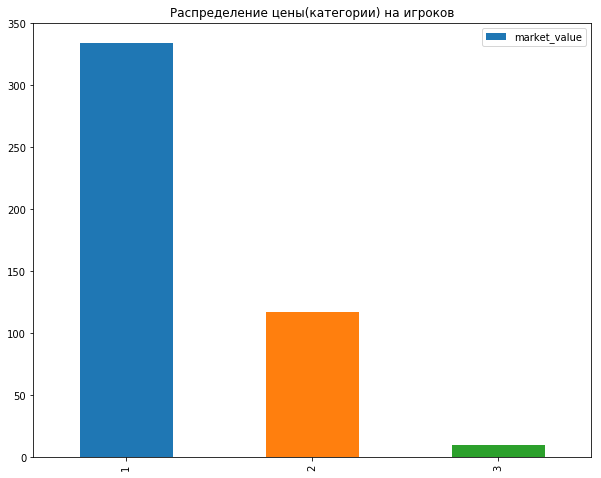

In [12]:
df['market_value'].value_counts().plot(kind='bar', label='market_value')
plt.legend()
plt.title('Распределение цены(категории) на игроков');

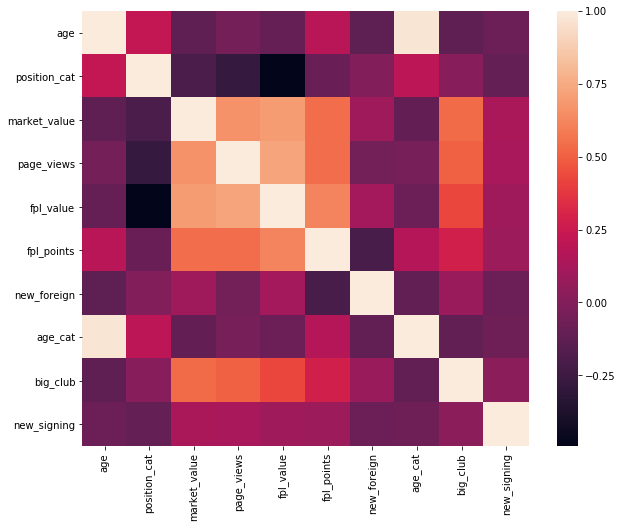

In [13]:
corr_matrix = (df_numeric).corr()
sns.heatmap(corr_matrix);
#один признак точно уберем или 'age', или 'age_cat', они сильно  скоррелированы

In [14]:
df = df.drop(['age_cat'], axis=1)

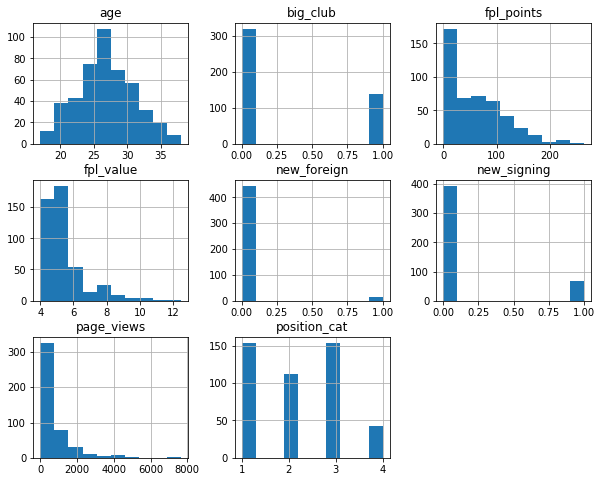

In [15]:
features = list(['age', 'position_cat', 'page_views', 'fpl_value', \
                 'fpl_points', 'new_foreign', 'big_club', 'new_signing'])

df[features].hist(figsize=(10,8));

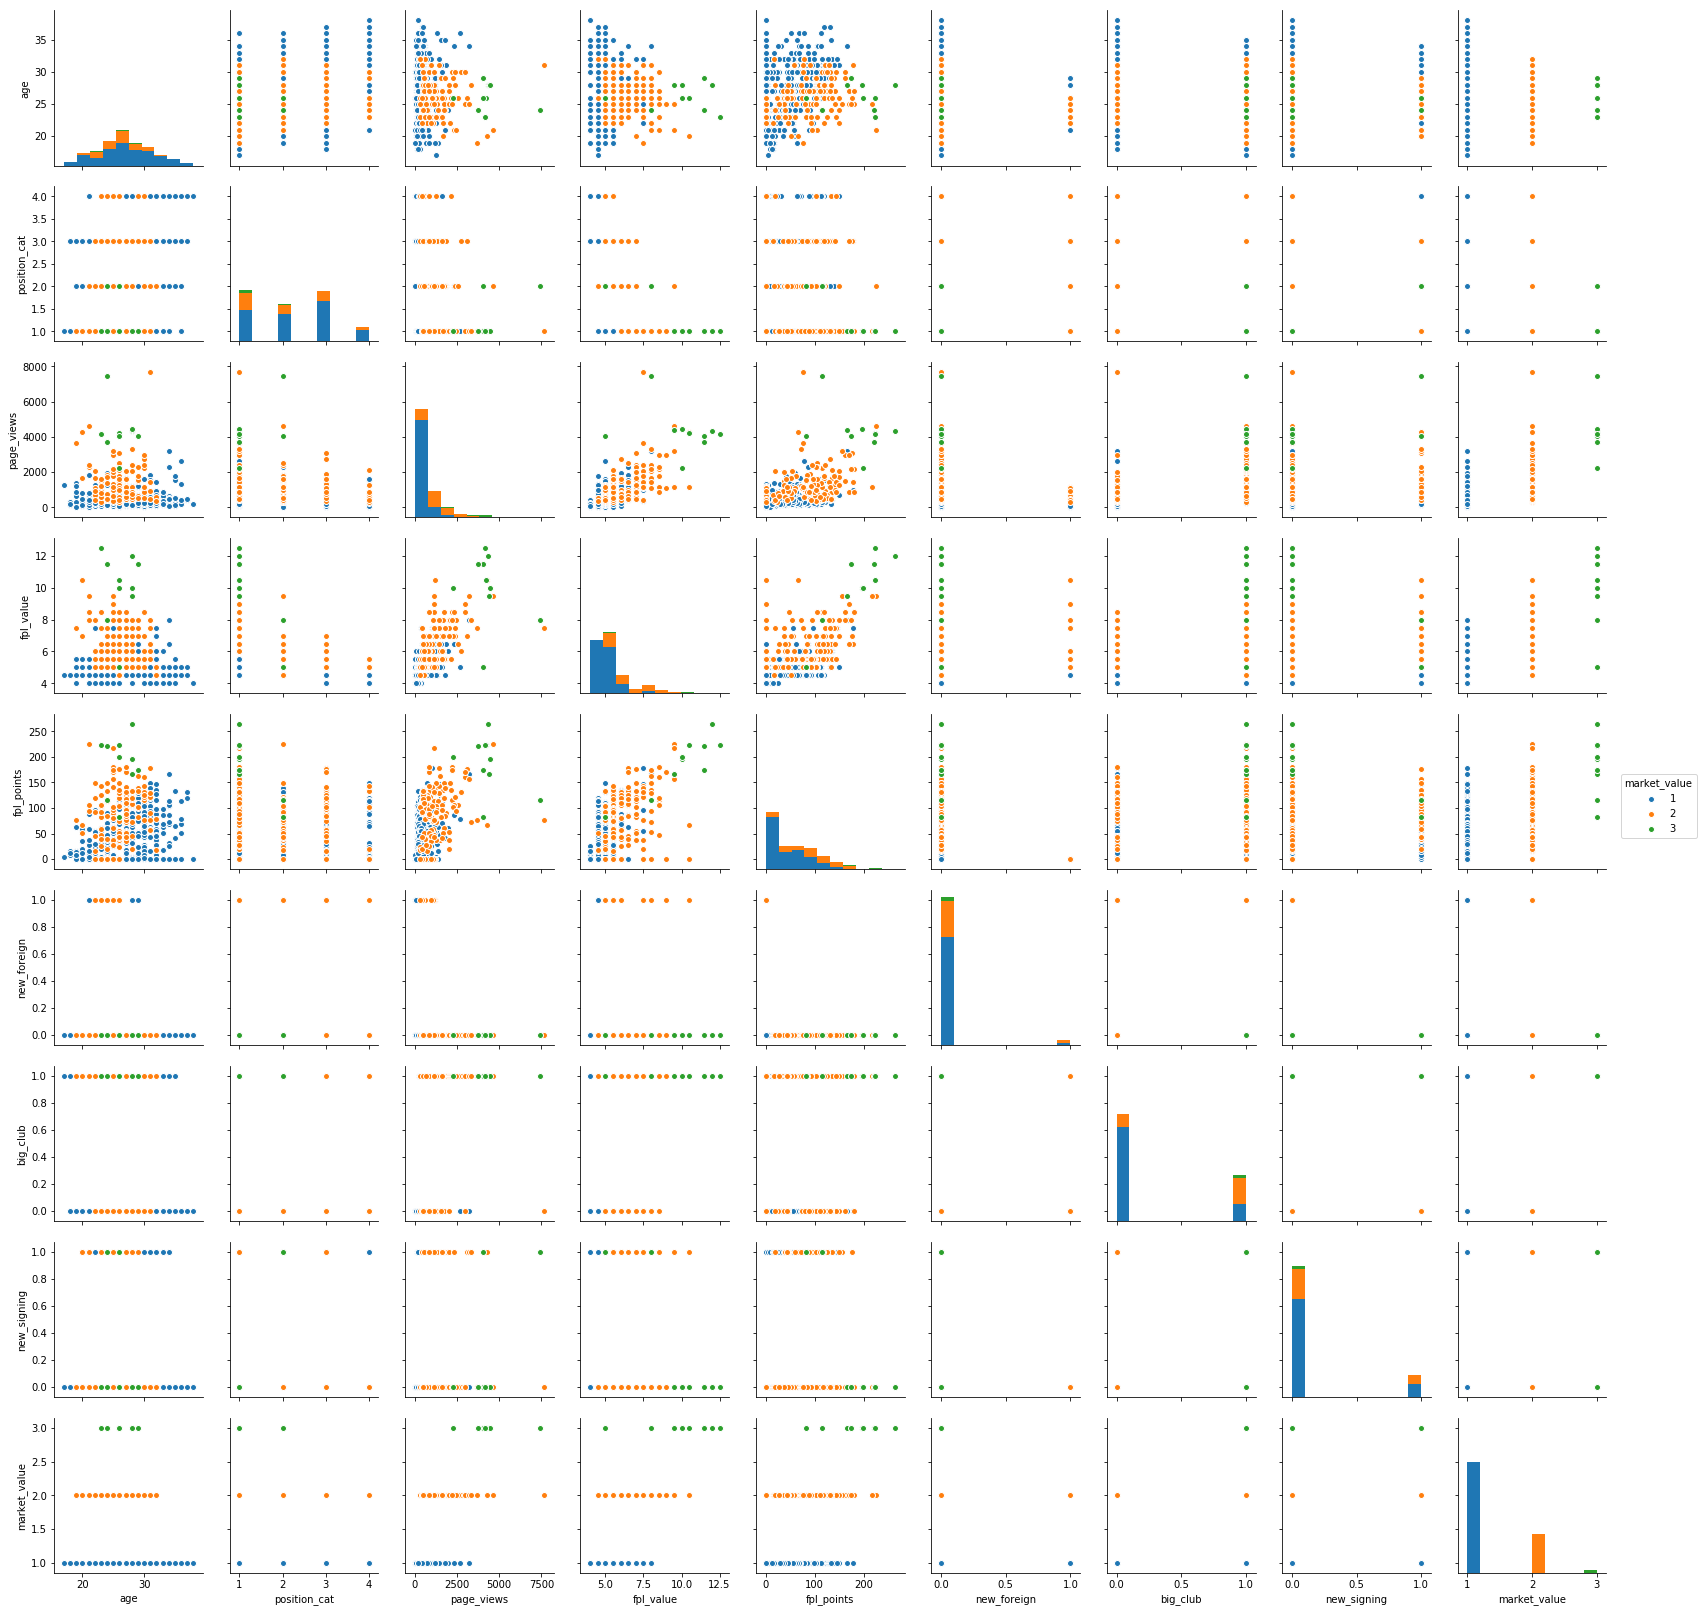

In [16]:
sns.pairplot(df[features + ['market_value']], hue='market_value');

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


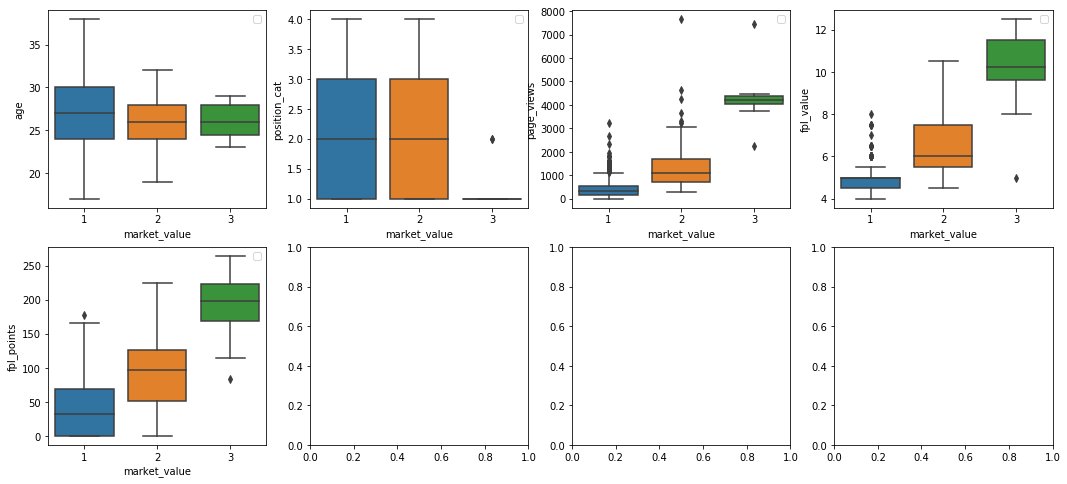

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 8))
features_correct = list(['age', 'position_cat', 'page_views', 'fpl_value', \
                 'fpl_points'])

for idx, feat in  enumerate(features_correct):
    sns.boxplot(x='market_value', y=feat, data=df, ax=axes[int(idx / 4), idx % 4])
    axes[int(idx / 4), idx % 4].legend()
    axes[int(idx / 4), idx % 4].set_xlabel('market_value')
    axes[int(idx / 4), idx % 4].set_ylabel(feat);

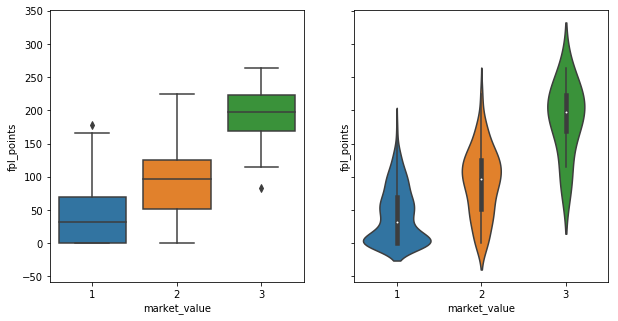

In [18]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 5))

sns.boxplot(x='market_value', y='fpl_points', data=df, ax=axes[0]);
sns.violinplot(x='market_value', y='fpl_points', data=df, ax=axes[1]);

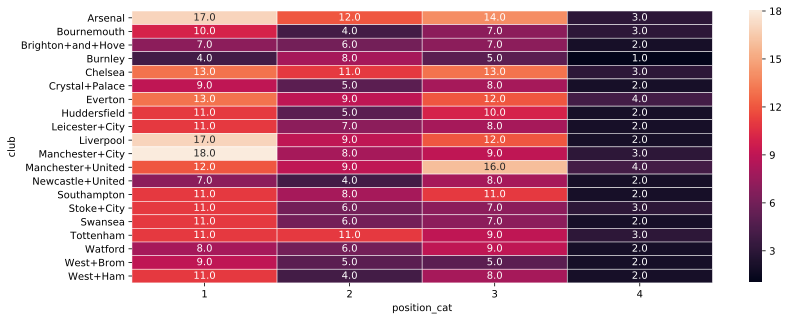

In [19]:
# если не применять ф-ию category() к признаку market_value, то можно увидеть интересное распределение
# после применения смысл теряется
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 13, 5

platform_genre_sales = df.pivot_table(
                        index='club', 
                        columns='position_cat', 
                        values='market_value', 
                        aggfunc=sum).fillna(0).applymap(int)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

In [20]:
# посмотррим, как 'примерно' расположены наши объекты в пространстве большой размерности 
scaler = StandardScaler()
df_numeric_scaled = scaler.fit_transform(df_numeric)

In [21]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(df_numeric_scaled)

Wall time: 17.1 s


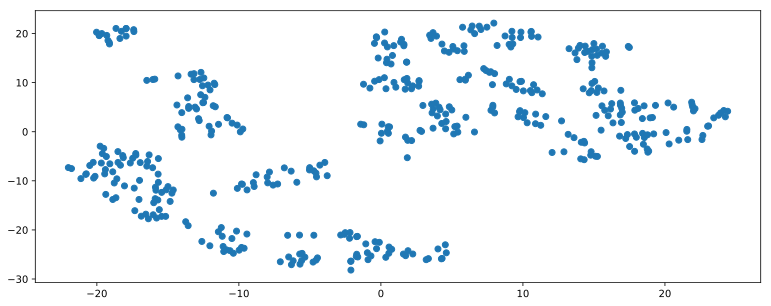

In [22]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

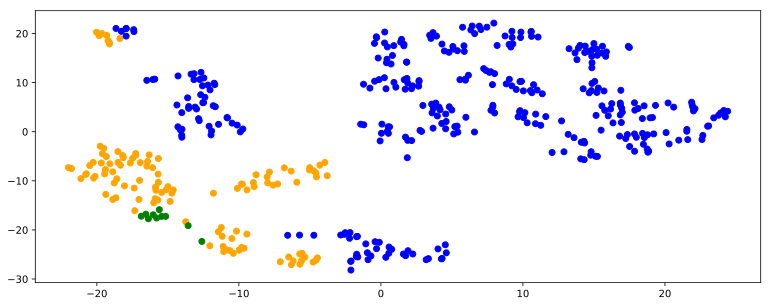

In [23]:
# кажется, что даже не плохо разделены
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1], 
            c=df['market_value'].map({1: 'blue', 2: 'orange', 3: 'green'}));

In [24]:
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,3,4329,12.0,17.10%,264,3.0,Chile,0,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,3,4395,9.5,5.60%,167,2.0,Germany,0,1,1,0
2,Petr Cech,Arsenal,35,GK,4,1,1529,5.5,5.90%,134,2.0,Czech Republic,0,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,2,2393,7.5,1.50%,122,1.0,England,0,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,2,912,6.0,0.70%,121,2.0,France,0,1,1,0


In [25]:
# чемпианат английский, посмотрим сколько англичан играют в командах
# суть в том, чтобы проверить очевидное предположение, что в крупных командах будут играть меньше англичан, крупные команды могут позволить больше трансферов 
# челси - 1 англичанин
# в целом это верно, но есть и крупные команды, где приличная доля англичан, видимо эти англичане, это хорошие игроки
club_name_list = list(df.club.unique())
for i in club_name_list:
    print('club - {0}, English share - {1}'.format(i,
    df[(df['club'] == i) & (df['nationality'] == 'England')].shape[0] \
    / df[df['club'] == i].shape[0]))

club - Arsenal, English share - 0.25
club - Bournemouth, English share - 0.5416666666666666
club - Brighton+and+Hove, English share - 0.36363636363636365
club - Burnley, English share - 0.5555555555555556
club - Chelsea, English share - 0.05
club - Crystal+Palace, English share - 0.38095238095238093
club - Everton, English share - 0.5
club - Huddersfield, English share - 0.42857142857142855
club - Leicester+City, English share - 0.3333333333333333
club - Liverpool, English share - 0.37037037037037035
club - Manchester+City, English share - 0.2
club - Manchester+United, English share - 0.32
club - Newcastle+United, English share - 0.2857142857142857
club - Southampton, English share - 0.43478260869565216
club - Stoke+City, English share - 0.36363636363636365
club - Swansea, English share - 0.28
club - Tottenham, English share - 0.3
club - Watford, English share - 0.16666666666666666
club - West+Brom, English share - 0.3157894736842105
club - West+Ham, English share - 0.2727272727272727


In [26]:
club_name_list = list(df.club.unique())
small_clubs_names = list(df[df['big_club'] == 0]['club'].unique())
big_clubs_names = list(df[df['big_club'] == 1]['club'].unique())
only_english_player_small = 0
only_english_player_big = 0
oll_english_player_small = 0
oll_english_player_big = 0

for i in club_name_list:
    only_english = df[(df['club'] == i) & (df['nationality'] == 'England')].shape[0] 
    oll = df[df['club'] == i].shape[0]
    if (i in small_clubs_names):
        only_english_player_small += only_english
        oll_english_player_small += oll
    else:  
        only_english_player_big += only_english
        oll_english_player_big += oll
        
print('English share small clubs - {0}, English share big clubs - {1}' \
      .format(only_english_player_small / oll_english_player_small, only_english_player_big / oll_english_player_big))

English share small clubs - 0.37383177570093457, English share big clubs - 0.2571428571428571


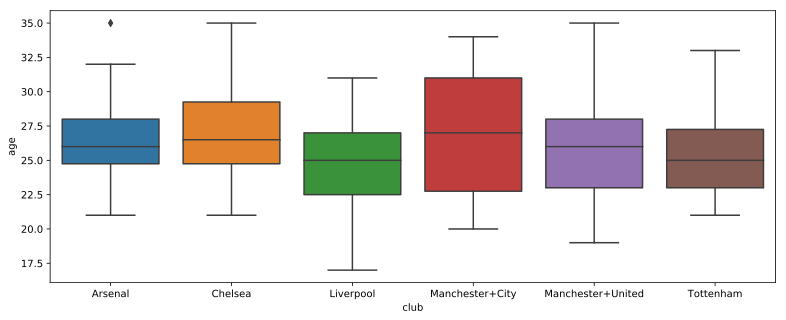

In [27]:
sns.boxplot(y="age", x="club", data=df[df['big_club'] == 1], orient="v")

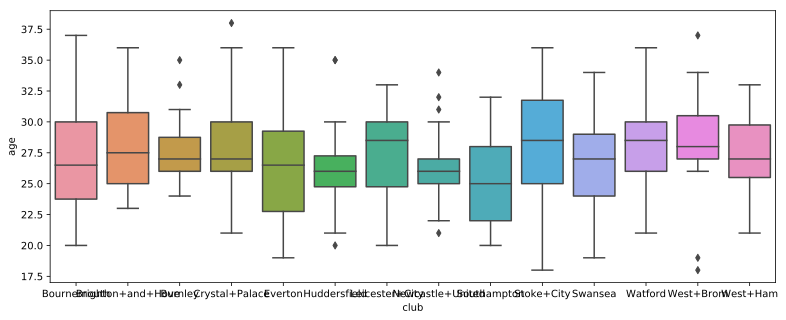

In [28]:
sns.boxplot(y="age", x="club", data=df[df['big_club'] == 0], orient="v")

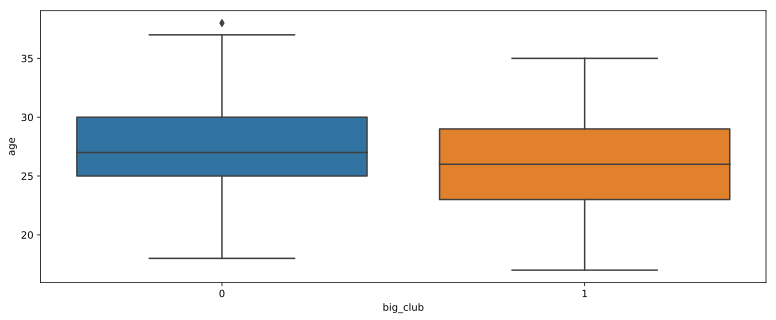

In [29]:
# посмотрим, отличается ли средний возраст игроков больших и маленьких клубов
sns.boxplot(y="age", x="big_club", data=df, orient="v")

In [30]:
df[df['big_club'] == 0].age.values[:140]

array([25, 34, 30, 37, 26, 27, 26, 23, 32, 24, 27, 30, 25, 22, 27, 30, 21,
       20, 21, 32, 29, 24, 23, 30, 32, 25, 25, 25, 31, 36, 29, 33, 24, 30,
       25, 27, 29, 34, 23, 25, 26, 27, 26, 33, 30, 28, 31, 27, 26, 27, 31,
       28, 27, 25, 28, 29, 33, 28, 26, 25, 24, 27, 26, 35, 24, 26, 26, 26,
       29, 30, 31, 31, 27, 28, 30, 36, 24, 27, 26, 29, 24, 29, 27, 21, 38,
       23, 32, 28, 32, 29, 24, 34, 23, 27, 27, 31, 26, 34, 36, 19, 20, 28,
       27, 27, 26, 30, 20, 19, 22, 20, 24, 24, 22, 21, 28, 27, 28, 25, 26,
       30, 21, 35, 27, 26, 26, 26, 28, 21, 24, 25, 35, 24, 26, 25, 25, 20,
       26, 27, 26, 28], dtype=int64)

In [31]:
from scipy.stats import ttest_rel
t_stat,p_value = ttest_rel(df[df['big_club'] == 0].age.values[:140], df[df['big_club'] == 1].age.values)

In [32]:
# получили статистически значимый результат, что средний возраст различается
t_stat,p_value

(2.24939514196755, 0.02605943141634435)